# Import Libary

In [2]:
pip install feature-engine

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, roc_curve
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import toad
from toad.transform import WOETransformer
from toad.selection import select
from toad.metrics import KS, AUC
from toad.plot import bin_plot, badrate_plot
from sklearn.metrics import roc_auc_score, recall_score, precision_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
import shap

# Import Dataset

In [4]:
# Import semua dataset
application_train = pd.read_csv('application_train.csv')

In [5]:
application_train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Data Preprocessing Training Set

## 1. Checking and Handling Missing Value

Menghapus nilai yang mengandung NA atau Kosong

In [8]:
# Checking nilai Missing Value
application_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [9]:
df_train = application_train.dropna()

In [10]:
df_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_QRT,0


## 2. Checking Duplicate Value
Memeriksa nilai yang terindikasi duplikat

In [11]:
df_train.duplicated().sum()

np.int64(0)

## 3. Feature Selection
Menghapus variabel yang kurang relevan untuk modeling

In [12]:
df_train.drop(['SK_ID_CURR', 'NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
               'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
               'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
               'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG','BASEMENTAREA_AVG',
               'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
               'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
               'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
               'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
               'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
               'YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
               'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE',
               'TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
               'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
               'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY', 'OWN_CAR_AGE'], axis=1, inplace=True)

<ipython-input-12-073f661d63bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['SK_ID_CURR', 'NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TARGET                8602 non-null   int64  
 1   NAME_CONTRACT_TYPE    8602 non-null   object 
 2   CODE_GENDER           8602 non-null   object 
 3   FLAG_OWN_CAR          8602 non-null   object 
 4   FLAG_OWN_REALTY       8602 non-null   object 
 5   CNT_CHILDREN          8602 non-null   int64  
 6   AMT_INCOME_TOTAL      8602 non-null   float64
 7   AMT_CREDIT            8602 non-null   float64
 8   NAME_INCOME_TYPE      8602 non-null   object 
 9   NAME_EDUCATION_TYPE   8602 non-null   object 
 10  NAME_FAMILY_STATUS    8602 non-null   object 
 11  NAME_HOUSING_TYPE     8602 non-null   object 
 12  DAYS_BIRTH            8602 non-null   int64  
 13  DAYS_EMPLOYED         8602 non-null   int64  
 14  OCCUPATION_TYPE       8602 non-null   object 
 15  CNT_FAM_MEMBERS       8

## 4. Feature Engineering

In [14]:
# Mengubah variabel 'DAYS_BIRTH' menjadi usia kreditur
df_train['AGE'] = df_train['DAYS_BIRTH'] / -365
df_train['AGE'] = df_train['AGE'].apply(np.floor)

# Menghapus variabel 'DAYS_BIRTH'
df_train.drop(['DAYS_BIRTH'], axis=1, inplace=True)

<ipython-input-14-c1c46e4c7893>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AGE'] = df_train['DAYS_BIRTH'] / -365
<ipython-input-14-c1c46e4c7893>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['AGE'] = df_train['AGE'].apply(np.floor)
<ipython-input-14-c1c46e4c7893>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [15]:
# Mengubah variabel 'LONG_WORK' menjadi lama kreditur bekerja (dalam tahun)
df_train['WORK_DURATION'] = df_train['DAYS_EMPLOYED'] / -365
df_train['WORK_DURATION'] = df_train['WORK_DURATION'].apply(np.floor)

# Menghapus variabel 'DAYS_EMPLOYED'
df_train.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

<ipython-input-15-87d69918f335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['WORK_DURATION'] = df_train['DAYS_EMPLOYED'] / -365
<ipython-input-15-87d69918f335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['WORK_DURATION'] = df_train['WORK_DURATION'].apply(np.floor)
<ipython-input-15-87d69918f335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [16]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,AGE,WORK_DURATION
71,0,Cash loans,M,Y,Y,0,103500.0,573628.5,Working,Secondary / secondary special,Married,House / apartment,Laborers,2.0,2,Business Entity Type 3,42.0,2.0
124,0,Cash loans,F,Y,Y,1,202500.0,260725.5,Working,Secondary / secondary special,Separated,House / apartment,Laborers,2.0,2,Self-employed,44.0,11.0
152,0,Cash loans,F,Y,N,0,202500.0,675000.0,Commercial associate,Higher education,Married,House / apartment,Managers,2.0,2,Trade: type 7,31.0,6.0
161,0,Cash loans,M,Y,N,0,162000.0,263686.5,Commercial associate,Higher education,Married,House / apartment,Laborers,2.0,2,Government,38.0,12.0
255,1,Cash loans,M,Y,N,1,225000.0,1019205.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,2.0,1,Business Entity Type 3,31.0,1.0


# Exploratory Data Analysis

## 1. Melihat korelasi antar variabel

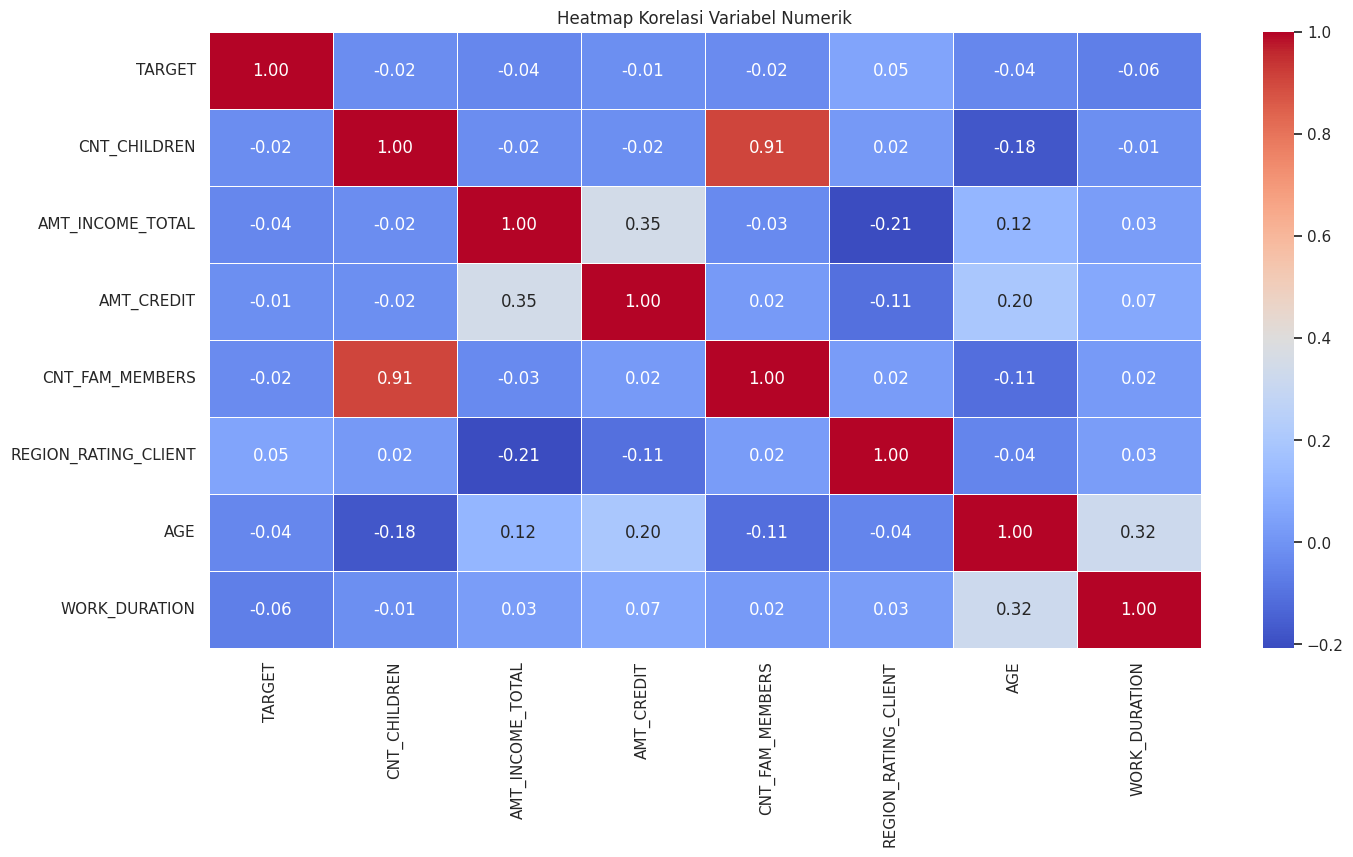

In [17]:
numerical_columns = df_train[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                              'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'AGE', 'WORK_DURATION']]

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

## 2. Jumlah Kreditur Berdasarkan Kemampuan Membayar

In [ ]:
import plotly.express as px

# Menghitung jumlah kreditur berdasarkan kategori pada variabel 'TARGET'
target_counts = df_clean['TARGET'].value_counts().reset_index()
target_counts.columns = ['TARGET', 'count']  # Rename columns explicitly

# Membuat Plot
fig = px.bar(target_counts, x='TARGET', y='count', color='TARGET',
             labels={'TARGET': 'Kategori', 'count': 'Jumlah Klien'},
             title='<b>Jumlah Kreditur Berdasarkan Kemampuan Membayar</b>')

# Customize the layout
fig.update_layout(
    xaxis_title='Kategori',
    yaxis_title='Jumlah Kreditur',
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5,
    title_font=dict(size=18),
    width=600,
    height=400
)

# Customize the x-axis labels
fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=['Tidak Ada Kesulitan', 'Ada Kesulitan']
)

# Add value labels on top of bars
fig.update_traces(
    textposition='outside',
    textfont_size=12,
    marker_line_color='black',
    marker_line_width=1
)

# Add value labels on top of bars
fig.update_traces(
    textposition='outside',
    textfont_size=12,
    marker_line_color='black',
    marker_line_width=1
)

# Show the plot
fig.show()

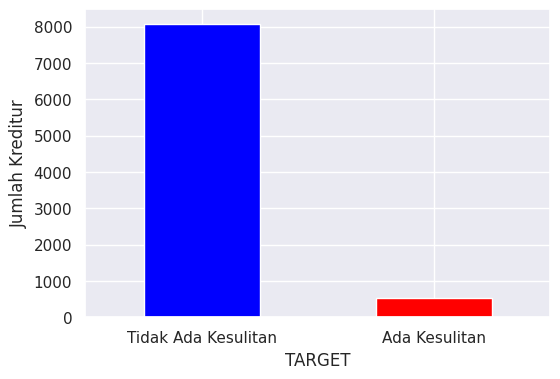

In [ ]:
plt.figure(figsize=(6, 4))
df_train['TARGET'].value_counts().plot(kind='bar', color=['Blue', 'Red'])
plt.xlabel('TARGET')
plt.ylabel('Jumlah Kreditur')
plt.xticks([0, 1], ['Tidak Ada Kesulitan', 'Ada Kesulitan'], rotation=0)
plt.show()

## 3. Jumlah Kreditur Berdasarkan Jenis Kelamin

In [ ]:
fig = px.bar(df_train, x='CODE_GENDER', y='TARGET', color='CODE_GENDER',
             color_discrete_map={0: 'lightgreen', 1: 'pink'},
             labels={'CODE_GENDER':'Jenis Kelamin', 'TARGET':'Target'},
             title='<b>Jumlah Kreditur Berdasarkan Jenis Kelamin</b>')

# Customize the layout
fig.update_layout(
    xaxis_title='Jenis Kelamin',
    yaxis_title='Jumlah Kreditur',
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5,
    title_font=dict(size=18),
    width=600,
    height=400
)

# Customize the x-axis labels
fig.update_xaxes(
    tickvals=[0, 1],
    ticktext=['Pria', 'Wanita']
)

fig.show()

## Jumlah Kreditur Berdasarkan Usia

In [ ]:
import pandas as pd
import plotly.express as px

# Misal df adalah DataFrame kamu dan memiliki kolom 'AGE' dan 'AMT_INCOME_TOTAL'

# 1. Buat kategori umur
bins = [0, 25, 35, 45, 55, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55+']
df_train['AGE_GROUP'] = pd.cut(df_train['AGE'], bins=bins, labels=labels, right=False)

# 2. Hitung jumlah dan rata-rata penghasilan per kelompok umur
age_group_summary = df_train.groupby('AGE_GROUP').agg(
    Jumlah_Kreditur=('AGE_GROUP', 'count'),
    Rata2_Income=('AMT_INCOME_TOTAL', 'mean')
).reset_index()

# 3. Pie chart seperti contoh gapminder
fig = px.pie(
    age_group_summary,
    values='Jumlah_Kreditur',
    names='AGE_GROUP',
    title='<b>Distribusi Kreditur Berdasarkan Kelompok Umur</b>',
    hover_data=['Rata2_Income'],
    labels={'AGE_GROUP': 'Kelompok Umur', 'Rata2_Income': 'Rata-rata Penghasilan'}
)

# 4. Tambahkan persentase + label di dalam pie
fig.update_traces(textposition='inside', textinfo='percent+label')

# Customize the layout
fig.update_layout(
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5,
    title_font=dict(size=18),
    width=600,
    height=400
)

fig.show()


<ipython-input-65-95e9f3aed190>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-95e9f3aed190>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Jumlah Kreditur Berdasakan Pekerjaan

In [ ]:
# Hitung jumlah kreditur berdasarkan pekerjaan
df_counts = df_train['OCCUPATION_TYPE'].value_counts().reset_index()
df_counts.columns = ['OCCUPATION_TYPE', 'Jumlah_Kreditur']

# Buat bar chart
fig = px.bar(
    df_counts,
    x='OCCUPATION_TYPE',
    y='Jumlah_Kreditur',
    title='<b>Jumlah Kreditur Berdasarkan Pekerjaan</b>',
    labels={'OCCUPATION_TYPE': 'Jenis Pekerjaan', 'Jumlah_Kreditur': 'Jumlah Kreditur'},
    color='Jumlah_Kreditur',
    color_continuous_scale='Blues'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Jenis Pekerjaan',
    yaxis_title='Jumlah Kreditur',
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5,
    title_font=dict(size=18),
    width=1000,
    height=600
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

## Jumlah Kreditur Berdasarkan Pendidikan Tingkat Akhir

In [ ]:
# Hitung jumlah kreditur berdasarkan tingkat pendidikan
df_counts = df_train['NAME_EDUCATION_TYPE'].value_counts().reset_index()
df_counts.columns = ['NAME_EDUCATION_TYPE', 'Jumlah_Kreditur']

# Buat bar chart
fig = px.bar(
    df_counts,
    x='NAME_EDUCATION_TYPE',
    y='Jumlah_Kreditur',
    title='<b>Jumlah Kreditur Berdasarkan Tingkat Pendidikan</b>',
    labels={'NAME_EDUCATION_TYPE': 'Tingkat Pendidikan', 'Jumlah_Kreditur': 'Jumlah Kreditur'},
    color='Jumlah_Kreditur',
    color_continuous_scale='Viridis'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Tingkat Pendidikan',
    yaxis_title='Jumlah Kreditur',
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5,
    title_font=dict(size=18),
    width=800,
    height=400
)

fig.update_layout(xaxis_tickangle=-30)
fig.show()

## Jumlah Kreditur Berdasarkan Status Keluarga

In [ ]:
# Hitung jumlah kreditur berdasarkan status keluarga
df_counts = df_train['NAME_FAMILY_STATUS'].value_counts().reset_index()
df_counts.columns = ['NAME_FAMILY_STATUS', 'Jumlah_Kreditur']

# Buat bar chart
fig = px.bar(
    df_counts,
    x='NAME_FAMILY_STATUS',
    y='Jumlah_Kreditur',
    title='<b>Jumlah Kreditur Berdasarkan Status Perkawinan</b>',
    labels={'NAME_FAMILY_STATUS': 'Status Perkawinan', 'Jumlah_Kreditur': 'Jumlah Kreditur'},
    color='Jumlah_Kreditur',
    color_continuous_scale='Sunset'
)

# Customize the layout
fig.update_layout(
    xaxis_title='Status Perkawinan',
    yaxis_title='Jumlah Kreditur',
    showlegend=False,
    plot_bgcolor='white',
    title_x=0.5,
    title_font=dict(size=18),
    width=600,
    height=400
)

fig.update_layout(xaxis_tickangle=-25)
fig.show()

# Data Modeling

### Drop Fitur

In [18]:
# Drop kolom AGE_GROUP dari train dan test
df_train = df_train.drop(columns=['AGE_GROUP'], errors='ignore')

## Label Encoder

In [19]:
label_encoder = LabelEncoder()

df_train['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_train['NAME_CONTRACT_TYPE'])
df_train['CODE_GENDER'] = label_encoder.fit_transform(df_train['CODE_GENDER'])
df_train['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_train['FLAG_OWN_CAR'])
df_train['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_train['FLAG_OWN_REALTY'])
df_train['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_train['NAME_INCOME_TYPE'])
df_train['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_train['NAME_EDUCATION_TYPE'])
df_train['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_train['NAME_FAMILY_STATUS'])
df_train['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_train['NAME_HOUSING_TYPE'])
df_train['OCCUPATION_TYPE'] = label_encoder.fit_transform(df_train['OCCUPATION_TYPE'])
df_train['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_train['ORGANIZATION_TYPE'])

## Splitting Data

In [20]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

# Split data ke train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [21]:
df_train['TARGET'].value_counts()

,count
TARGET,
0,8076
1,526


# Normalisasi Variabel Numerik

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

### Buat pipeline balancing data

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

### Model Regresi Logistik

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

### Model Evaluation

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.95      0.59      0.73      2423
           1       0.08      0.55      0.14       158

    accuracy                           0.59      2581
   macro avg       0.52      0.57      0.43      2581
weighted avg       0.90      0.59      0.69      2581

Confusion Matrix:


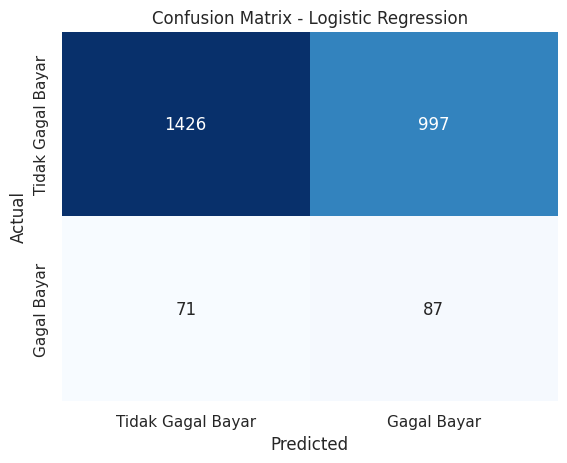

In [25]:
# Prediksi pada data test
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluasi
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Gagal Bayar', 'Gagal Bayar'], yticklabels=['Tidak Gagal Bayar', 'Gagal Bayar'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

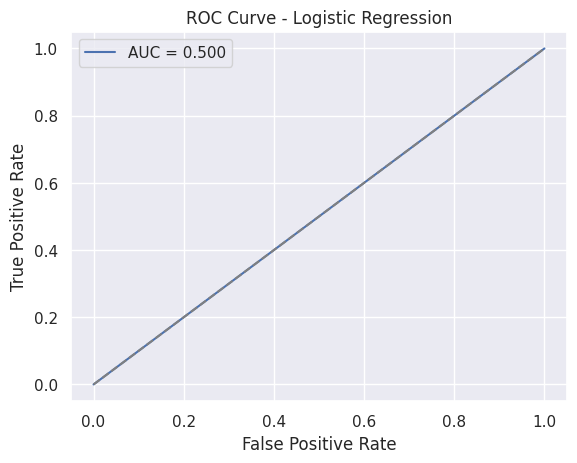

In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_logreg)
auc_score = roc_auc_score(y_test, y_proba_logreg)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

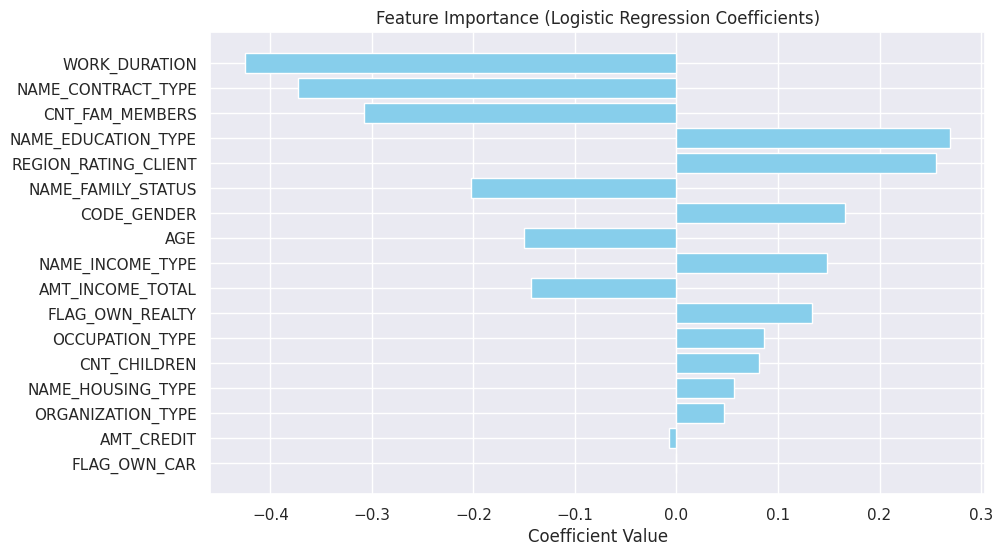

In [30]:
# Ambil nama kolom fitur yang dipakai model (gabungan numerik + WoE)
feature_names = X_train.columns

# Ambil koefisien dari model
coefficients = logreg.coef_[0]

# Buat DataFrame untuk visualisasi
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Urutkan berdasarkan nilai absolut koefisien, supaya yang paling penting di atas
feat_imp['abs_coeff'] = np.abs(feat_imp['Coefficient'])
feat_imp = feat_imp.sort_values(by='abs_coeff', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.gca().invert_yaxis()  # supaya fitur teratas muncul di atas
plt.show()

# Random Forest

In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)

# Prediksi di test set
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

Random Forest Report
                   precision    recall  f1-score   support

Tidak Gagal Bayar       0.94      0.90      0.92      2423
      Gagal Bayar       0.07      0.12      0.09       158

         accuracy                           0.85      2581
        macro avg       0.51      0.51      0.50      2581
     weighted avg       0.89      0.85      0.87      2581

Confusion Matrix:


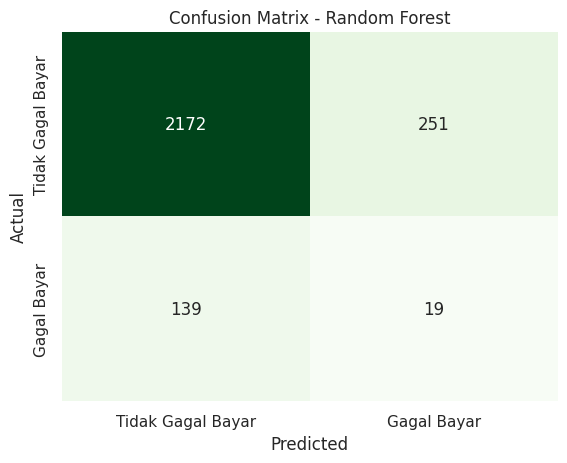

In [32]:
# Evaluasi dengan threshold custom
custom_threshold = 0.3
y_pred_rf_thresh = (y_proba_rf >= custom_threshold).astype(int)

print(f"Random Forest Report")
print(classification_report(y_test, y_pred_rf_thresh, target_names=['Tidak Gagal Bayar', 'Gagal Bayar']))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf_thresh), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Tidak Gagal Bayar', 'Gagal Bayar'],
            yticklabels=['Tidak Gagal Bayar', 'Gagal Bayar'],
            cbar=False)
plt.title(f"Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [34]:
print("Akurasi:", accuracy_score(y_test, y_pred_rf_thresh))

Akurasi: 0.8488957768306857


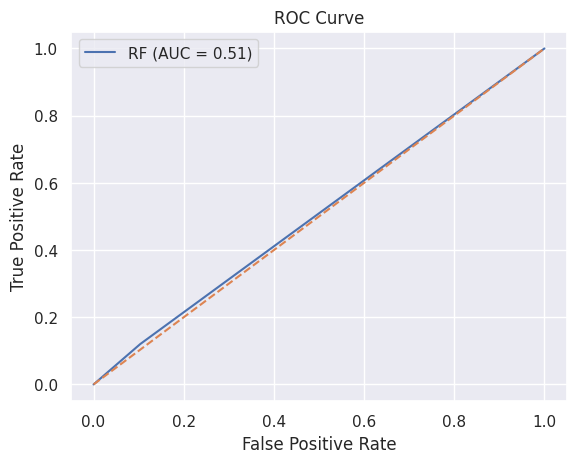

In [33]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rf_thresh)
plt.plot(fpr, tpr, label=f'RF (AUC = {roc_auc_score(y_test, y_pred_rf_thresh):.2f})')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hasil Prediksi LogReg dan Random Forest

In [36]:
# Gabungkan dengan data asli
hasil_prediksi = X_test.copy()
hasil_prediksi['Actual'] = y_test.values
hasil_prediksi['Pred_LogReg'] = y_pred_logreg
hasil_prediksi['Pred_RF'] = y_pred_rf

# Tampilkan 10 baris pertama
hasil_prediksi.head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,AGE,WORK_DURATION,Actual,Pred_LogReg,Pred_RF
12933,0,1,0,0,0,135000.0,485640.0,2,4,1,1,14,2.0,2,41,28.0,3.0,0,1,0
255052,0,0,0,0,2,202500.0,568197.0,2,1,1,1,14,4.0,2,41,43.0,1.0,0,0,0
33092,0,0,0,0,1,337500.0,582768.0,1,4,4,2,1,2.0,1,30,45.0,8.0,0,0,0
168812,0,1,0,0,1,135000.0,675000.0,2,4,0,5,14,3.0,2,41,27.0,3.0,0,1,0
101474,1,1,0,1,1,112500.0,225000.0,2,1,1,1,8,3.0,1,53,42.0,3.0,0,0,0
300291,0,0,0,0,1,207000.0,675000.0,0,1,1,1,6,3.0,2,4,34.0,5.0,0,0,0
199707,0,1,0,0,0,180000.0,697500.0,1,1,1,1,3,2.0,2,33,27.0,1.0,0,1,0
305658,0,1,0,1,0,202500.0,855000.0,0,1,1,1,14,2.0,2,41,50.0,2.0,0,1,0
139109,0,1,0,1,0,90000.0,112500.0,2,4,1,1,4,2.0,2,5,57.0,16.0,0,0,0
103059,1,0,0,1,0,229500.0,1350000.0,0,1,1,1,3,2.0,2,29,28.0,4.0,0,0,0


# Data Preprocessing Test Set

In [37]:
# Import Dataset
application_test = pd.read_csv('application_test.csv')

In [38]:
# Hapus Missing Value
application_test.isnull().sum()

,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049
AMT_REQ_CREDIT_BUREAU_WEEK,6049
AMT_REQ_CREDIT_BUREAU_MON,6049
AMT_REQ_CREDIT_BUREAU_QRT,6049


In [39]:
df_test = application_test.dropna()

In [40]:
# Feature Selection
df_test.drop(['NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
               'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
               'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
               'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG','BASEMENTAREA_AVG',
               'YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
               'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
               'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
               'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
               'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
               'YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI',
               'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE',
               'TOTALAREA_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
               'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
               'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_RATING_CLIENT_W_CITY', 'OWN_CAR_AGE'], axis=1, inplace=True)

<ipython-input-40-8d605fcb4563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['NAME_TYPE_SUITE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',


In [41]:
# Feature Engineering
# Mengubah variabel 'DAYS_BIRTH' menjadi usia kreditur
df_test['AGE'] = df_test['DAYS_BIRTH'] / -365
df_test['AGE'] = df_test['AGE'].apply(np.floor)

# Menghapus variabel 'DAYS_BIRTH'
df_test.drop(['DAYS_BIRTH'], axis=1, inplace=True)

<ipython-input-41-f38c23512c34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['AGE'] = df_test['DAYS_BIRTH'] / -365
<ipython-input-41-f38c23512c34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['AGE'] = df_test['AGE'].apply(np.floor)
<ipython-input-41-f38c23512c34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [42]:
# Mengubah variabel 'LONG_WORK' menjadi lama kreditur bekerja (dalam tahun)
df_test['WORK_DURATION'] = df_test['DAYS_EMPLOYED'] / -365
df_test['WORK_DURATION'] = df_test['WORK_DURATION'].apply(np.floor)

# Menghapus variabel 'DAYS_EMPLOYED'
df_test.drop(['DAYS_EMPLOYED'], axis=1, inplace=True)

<ipython-input-42-a93fb2976efa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['WORK_DURATION'] = df_test['DAYS_EMPLOYED'] / -365
<ipython-input-42-a93fb2976efa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['WORK_DURATION'] = df_test['WORK_DURATION'].apply(np.floor)
<ipython-input-42-a93fb2976efa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [43]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,AGE,WORK_DURATION
15,100107,Cash loans,M,Y,Y,0,180000.0,296280.0,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,1,Business Entity Type 3,37.0,2.0
18,100128,Cash loans,F,Y,Y,1,225000.0,431280.0,Commercial associate,Higher education,Civil marriage,With parents,Managers,3.0,2,Bank,30.0,5.0
73,100561,Cash loans,M,Y,Y,0,180000.0,67500.0,Working,Secondary / secondary special,Married,House / apartment,Laborers,2.0,2,Business Entity Type 3,32.0,7.0
86,100699,Cash loans,M,Y,Y,1,225000.0,323460.0,Working,Higher education,Married,House / apartment,Laborers,3.0,3,Other,36.0,4.0
102,100770,Cash loans,M,Y,N,0,202500.0,697500.0,Working,Incomplete higher,Married,With parents,Sales staff,2.0,2,Construction,24.0,2.0


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 15 to 48710
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SK_ID_CURR            1739 non-null   int64  
 1   NAME_CONTRACT_TYPE    1739 non-null   object 
 2   CODE_GENDER           1739 non-null   object 
 3   FLAG_OWN_CAR          1739 non-null   object 
 4   FLAG_OWN_REALTY       1739 non-null   object 
 5   CNT_CHILDREN          1739 non-null   int64  
 6   AMT_INCOME_TOTAL      1739 non-null   float64
 7   AMT_CREDIT            1739 non-null   float64
 8   NAME_INCOME_TYPE      1739 non-null   object 
 9   NAME_EDUCATION_TYPE   1739 non-null   object 
 10  NAME_FAMILY_STATUS    1739 non-null   object 
 11  NAME_HOUSING_TYPE     1739 non-null   object 
 12  OCCUPATION_TYPE       1739 non-null   object 
 13  CNT_FAM_MEMBERS       1739 non-null   float64
 14  REGION_RATING_CLIENT  1739 non-null   int64  
 15  ORGANIZATION_TYPE     17

In [45]:
# Label Encoder
label_encoder = LabelEncoder()

df_test['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_test['NAME_CONTRACT_TYPE'])
df_test['CODE_GENDER'] = label_encoder.fit_transform(df_test['CODE_GENDER'])
df_test['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_test['FLAG_OWN_CAR'])
df_test['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_test['FLAG_OWN_REALTY'])
df_test['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_test['NAME_INCOME_TYPE'])
df_test['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_test['NAME_EDUCATION_TYPE'])
df_test['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_test['NAME_FAMILY_STATUS'])
df_test['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_test['NAME_HOUSING_TYPE'])
df_test['OCCUPATION_TYPE'] = label_encoder.fit_transform(df_test['OCCUPATION_TYPE'])
df_test['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_test['ORGANIZATION_TYPE'])

<ipython-input-45-5cbd3a3caa7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_test['NAME_CONTRACT_TYPE'])
<ipython-input-45-5cbd3a3caa7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['CODE_GENDER'] = label_encoder.fit_transform(df_test['CODE_GENDER'])
<ipython-input-45-5cbd3a3caa7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# Hasil Prediksi dengan Logistic Regression

In [46]:
# Prediksi
X_test_final_logreg = df_test.drop(columns=['SK_ID_CURR'])

# Lalu prediksi
test_predictions_logreg = logreg.predict(X_test_final_logreg)
test_probabilities_logreg = logreg.predict_proba(X_test_final_logreg)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [47]:
# Simpan hasil prediksi
hasil_prediksi_logreg = pd.DataFrame({
    'SK_ID_CURR': df_test['SK_ID_CURR'],
    'PREDICTED_TARGET': test_predictions_logreg,
    'PROBABILITY': test_probabilities_logreg
})

In [48]:
hasil_prediksi_logreg['SK_ID_CURR'] = df_test['SK_ID_CURR'].values
hasil_prediksi_logreg = hasil_prediksi_logreg[['SK_ID_CURR', 'PREDICTED_TARGET', 'PROBABILITY']]
print(hasil_prediksi_logreg.head())

     SK_ID_CURR  PREDICTED_TARGET  PROBABILITY
15       100107                 0          0.0
18       100128                 0          0.0
73       100561                 0          0.0
86       100699                 0          0.0
102      100770                 0          0.0


# Hasil Prediksi dengan Random Forest

In [49]:
# Prediksi
X_test_final = df_test.drop(columns=['SK_ID_CURR'])

# Lalu prediksi
test_predictions = rf.predict(X_test_final)
test_probabilities = rf.predict_proba(X_test_final)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [50]:
# 4. Simpan hasil prediksi
hasil_prediksi = pd.DataFrame({
    'SK_ID_CURR': df_test['SK_ID_CURR'],
    'PREDICTED_TARGET': test_predictions,
    'PROBABILITY': test_probabilities
})

In [51]:
hasil_prediksi['SK_ID_CURR'] = df_test['SK_ID_CURR'].values
hasil_prediksi = hasil_prediksi[['SK_ID_CURR', 'PREDICTED_TARGET', 'PROBABILITY']]
print(hasil_prediksi.head())

     SK_ID_CURR  PREDICTED_TARGET  PROBABILITY
15       100107                 0         0.36
18       100128                 0         0.39
73       100561                 0         0.28
86       100699                 0         0.20
102      100770                 0         0.35
